# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [7]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [8]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [9]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3753864942016766
rmse median 0.44749128346135275


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [10]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [11]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.13099107599691856
mean error unbiased 0.013843744670261672


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [12]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

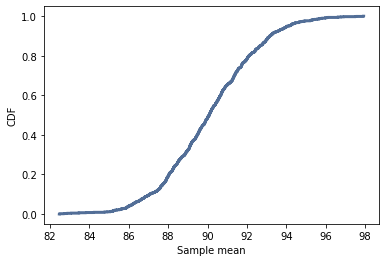

In [13]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [14]:
np.mean(xbars)

90.11526974685833

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [15]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(86.19595943353328, 94.03112558809558)

And the RMSE of the sample means is called the standard error.

In [16]:
stderr = RMSE(xbars, 90)
stderr

2.397888355120159

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [17]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0076606738915896
rmse Lm 1.723543591761978
mean error L 0.24556233620079718
mean error Lm 0.32421531142237064


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [18]:
def Estimate1(n=7, iters=1000):
    """Evaluates the RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []

    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('MeanError(means, mu):\n',MeanError(means, mu))
    print('MeanError(medians, mu):\n',MeanError(medians, mu))
    print('RMSE xbar', RMSE(means, mu))
    print('RMSE median', RMSE(medians, mu))

Estimate1()

Experiment 1
MeanError(means, mu):
 -0.005423830142612068
MeanError(medians, mu):
 -0.014484367400808782
RMSE xbar 0.383037503215317
RMSE median 0.45887044163643653


In [20]:
def Estimate2(n=7, iters=1000):
    """Evaluates the RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []

    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    print('RMSE variance - biased', RMSE(estimates1, sigma**2))
    print('RMSE variance - unbiased', RMSE(estimates2, sigma**2))

Estimate2()

Experiment 2
mean error biased -0.13530524963089352
mean error unbiased 0.008810542097290913
RMSE variance - biased 0.5215290031543341
RMSE variance - unbiased 0.5876828098698313


In [21]:
# Solution goes here

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [24]:
def SimulateSampleExpo(lam=2.0, n=10, iters=1000):
    """Simulate samples of exponential dist of lambda 'lam'
    of size 'n' for 'm' iters.
    lam: float shape parameter
    n: sample size
    iters: number of iterations

    return:
         Ls - estimates of lam based on mean
         Lms - estimates of lam based on median
    """
    Ls = []
    Lms = []
    for j in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1/ np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        Ls.append(L)
        Lms.append(Lm)

    return Ls, Lms

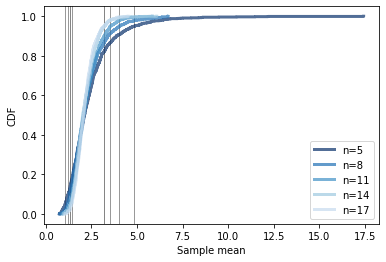

In [28]:
    ## SimulateSampleExpo
    ns = np.arange(5,20, step=3)
    conf = 90
    lam=2

    thinkplot.PrePlot(len(ns))
    stderrs = []

    for n in ns:
        Ls, Lms = SimulateSampleExpo(lam=lam,n=n)

        cdf = thinkstats2.Cdf(Ls)
        low = (100-conf)/2
        ci = cdf.Percentile(low), cdf.Percentile(100-low)
        label='n=%d' %n
        thinkplot.Cdf(cdf, label=label)
        thinkplot.Vlines(ci, -1,2, alpha=0.8, color='0.5')

        stderr = RMSE(Ls, 2)
        stderrs.append(stderr)

    thinkplot.Config(xlabel='Sample mean',
                     ylabel='CDF',
                     ylim=[-0.05, 1.05])


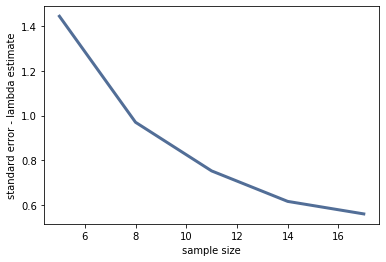

In [29]:
thinkplot.Plot(ns, stderrs)
thinkplot.Config(xlabel='sample size',
                 ylabel='standard error - lambda estimate')

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [50]:
def SimulateGame(lam):
    """Simulates hockey game with time between goals for one team
    distributed along exponential distribution of shape 'lam'.
    Game ends when time exceeds 1.
    lam: float shape parameter

    returns: int number of goals
    """
    t = 0
    goals = 0
    while True:
        dt = np.random.exponential(1.0/lam)
        t += dt
        if t > 1:
            break
        goals += 1

    L = goals
    return L

In [52]:
def EstimateLamFromGames(lam=4, iters=1000):
    """Uses hockey simulation to estimate exponential scale parameter 'lam'.

    lam: float goals per game
    iters: number of iterations
    """
    Ls = []
    for _ in range(iters):
        L = SimulateGame(lam)
        Ls.append(L)
        
    print('np.mean(Ls):\n',np.mean(Ls))
    print('RMSE(Ls, lam):\n',RMSE(Ls, lam))
    print('MeanError(Ls, lam):\n',MeanError(Ls, lam))
    
EstimateLamFromGames()

np.mean(Ls):
 3.988
RMSE(Ls, lam):
 2.067849124090053
MeanError(Ls, lam):
 -0.012


In [94]:
def HockeyCompetition(lam1=4, lam2=3, games=82):
    """Simulates hockey games between two teams with exponential goal scoring
    distributions of 'lam1' and 'lam2'.
    lam1: team 1 scale parameter
    lam2: team 2 scale parameter
    games: number of games between teams
    """
    wins1 = 0
    wins2 = 0
    ties = 0
    for _ in range(games):
        goals1 = SimulateGame(lam1)
        goals2 = SimulateGame(lam2)

        if goals1 > goals2:
            wins1 += 1
        elif goals2 > goals1:
            wins2 += 1
        elif goals1 == goals2:
            ties += 1

    print('Team 1 Record:')
    print('%d wins \n%d losses \n%d ties' %(wins1, wins2, ties))

HockeyCompetition(lam1=4, lam2=3.9)

Team 1 Record:
29 wins 
38 losses 
15 ties
